# Europe domain

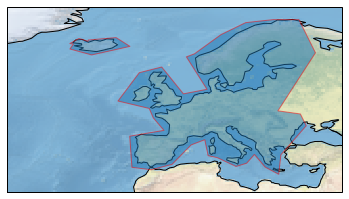

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cloud_colocations.shapes import opera

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-40, 40, 30, 70])

# put a background image on for nice sea rendering.
ax.stock_img()

# create a feature for states/admin 1 regions at 1:50m from natural earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

source = 'natural earth'
license = 'public domain'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(cfeature.ShapelyFeature([opera],
                                       edgecolor = "red",
                                       crs = ccrs.PlateCarree()), alpha = 0.5)

# add a text annotation for the license information to the
# the bottom right corner.
plt.show()

In [2]:
from datetime import datetime
from cloud_colocations.colocations.products import set_cache
from cloud_colocations.colocations.formats import GPMGMI1C

set_cache("../data")
t = datetime(2018, 6, 12)
files = GPMGMI1C.get_files_by_day(t)

https://gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L1C/GPM_1CGPMGMI_R.05/2018/163/1C-R.GPM.GMI.XCAL2016-C.20180612-S225952-E003227.024367.V05A.HDF5


In [3]:
f1 = next(files)

In [4]:
lons = f1.lon_s2
lons = lons[lons > -1000]

lats = f1.lat_s2
lats = lats[lats > -1000]


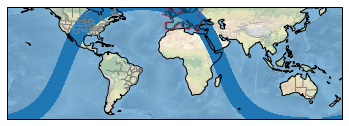

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cloud_colocations.shapes import opera

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, 60])

# put a background image on for nice sea rendering.
ax.stock_img()

# create a feature for states/admin 1 regions at 1:50m from natural earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

source = 'natural earth'
license = 'public domain'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(cfeature.ShapelyFeature([opera],
                                       edgecolor = "red",
                                       crs = ccrs.PlateCarree()), alpha = 0.5)
ax.scatter(lons, lats)

# add a text annotation for the license information to the
# the bottom right corner.
plt.show()

In [6]:
from shapely.geometry import MultiPoint 
import numpy as np
coords = np.hstack([lons.reshape(-1, 1), lats.reshape(-1, 1)])
points = MultiPoint(coords)

ps = points.intersection(opera)

In [7]:
np.array(list(map(lambda x: getattr(x, "xy")[:], ps.geoms))).shape

(36438, 2, 1)

In [8]:
import glob
from h5py import File
f = glob.glob("../data/*GPM*")[0]
f = File(f)
list(f["S1"])

['ScanTime',
 'SCstatus',
 'Latitude',
 'Longitude',
 'Quality',
 'incidenceAngle',
 'sunGlintAngle',
 'incidenceAngleIndex',
 'Tc']

In [9]:
from cloud_colocations.colocations.formats import OperaRainfall
set_cache("../data")
t = datetime(2020, 1, 14)
files = OperaRainfall.get_files_by_day(t)

In [13]:
pc = ccrs.PlateCarree()

ll = np.array([-10.434, 31.746])
ul = np.array([-39.535, 67.023])
lr = np.array([29.421, 31.988])
ur = np.array([57.81, 67.62])

ll_t = proj_src.transform_point(ll[0], ll[1], pc)
ul_t = proj_src.transform_point(ul[0], ul[1], pc)
lr_t = proj_src.transform_point(lr[0], lr[1], pc)
ur_t = proj_src.transform_point(ur[0], ur[1], pc)

/home/simonpf/src/cloud_colocations/cloud_colocations/colocations/formats.py:1378: RuntimeWarning: invalid value encountered in greater
  return self.data > -9999000
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/home/simonpf/src/cloud_colocations/cloud_colocations/colocations/formats.py:1378: RuntimeWarning: invalid value encountered in greater
  return self.data > -9999000
/home/simonpf/build/anaconda3/lib/pytho

/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/home/simonpf/src/cloud_colocations/cloud_colocations/colocations/formats.py:1378: RuntimeWarning: invalid value encountered in greater
  return self.data > -9999000
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier ins

https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T08:45:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/home/simonpf/src/cloud_colocations/cloud_colocations/colocations/formats.py:1378: RuntimeWarning: invalid value encountered in greater
  return self.data > -9999000
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T09:00:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5
https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T09:15:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/home/simonpf/src/cloud_colocations/cloud_colocations/colocations/formats.py:1378: RuntimeWarning: invalid value encountered in greater
  return self.data > -9999000
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T09:30:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5
https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T09:45:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/home/simonpf/src/cloud_colocations/cloud_colocations/colocations/formats.py:1378: RuntimeWarning: invalid value encountered in greater
  return self.data > -9999000
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T10:00:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5
https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T10:15:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/home/simonpf/src/cloud_colocations/cloud_colocations/colocations/formats.py:1378: RuntimeWarning: invalid value encountered in greater
  return self.data > -9999000
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T10:30:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5
https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T10:45:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/home/simonpf/src/cloud_colocations/cloud_colocations/colocations/formats.py:1378: RuntimeWarning: invalid value encountered in greater
  return self.data > -9999000
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T11:00:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5
https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T11:15:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/home/simonpf/src/cloud_colocations/cloud_colocations/colocations/formats.py:1378: RuntimeWarning: invalid value encountered in greater
  return self.data > -9999000
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


OSError: Unable to open file (file signature not found)

https://geoservices.meteofrance.fr/services/odyssey?product=RAINFALL_RATE&time=2020-01-14T11:30:00Z&token=__E6Pz0KxDZqPxZSFNG6LVheD7j5ueeYzG__&format=HDF5


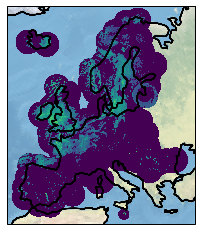

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm

for i,f in enumerate(files):
    f = next(files)
    i = i + 1
    ax = plt.axes(projection=proj_src)
    ax.set_extent([ll_t[0], ur_t[0], ll_t[1], ur_t[1]], crs = proj_src)

    # put a background image on for nice sea rendering.
    ax.stock_img()

    # create a feature for states/admin 1 regions at 1:50m from natural earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    source = 'natural earth'
    license = 'public domain'

    xx = np.linspace(ll_t[0], ur_t[0], 1900)
    yy = np.linspace(ur_t[1], ll_t[1], 2200)

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(states_provinces, edgecolor='gray')
    ax.scatter(lons, lats, s = 0.1)

    data = np.maximum(np.copy(f.data), 1e-3)
    data[np.logical_not(f.mask)] = np.nan
    ax.pcolormesh(xx, yy, data, norm = LogNorm())
    # add a text annotation for the license information to the
    # the bottom right corner.
    plt.savefig("opera_{}.png".format(str(i).zfill(2)))